In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("covid-19-data/us-states.csv")

In [19]:
illinois_bool = df["state"]=="Illinois"

In [20]:
illinois = df[illinois_bool]

In [21]:
illinois_firstDeath = illinois["deaths"] > 0

In [22]:
illinois_firstDeath = illinois[illinois_firstDeath]

In [23]:
print("-------------------------------------------------------------------------")
total_deaths = illinois[-1:]
print("Yesterday's numbers\n\n" + str(total_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Yesterday's numbers

            date     state  fips   cases  deaths
7728  2020-07-21  Illinois    17  165534    7521
-------------------------------------------------------------------------


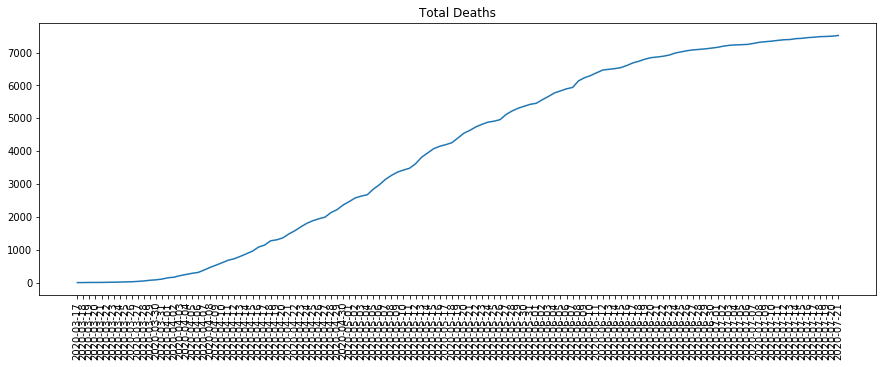

In [24]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Total Deaths")
ax.plot(illinois_firstDeath["date"], illinois_firstDeath["deaths"])

<h4>Plot the number of cases from when the number of cases were greather than 50</h4>

In [25]:
illinois_firstCase = illinois["cases"]>50

In [26]:
illinois_firstCase = illinois[illinois_firstCase]


Total number of cases


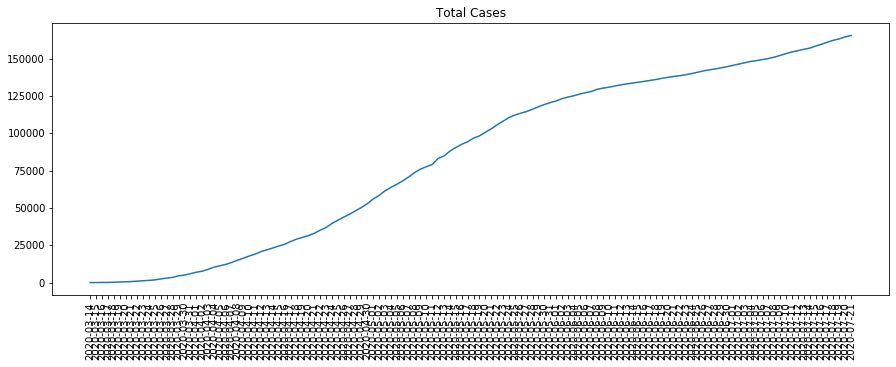

In [27]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
print("\nTotal number of cases")
plt.xticks(rotation = "90")
plt.title("Total Cases")
ax.plot(illinois_firstCase["date"], illinois_firstCase["cases"])

<h4>Get date of largest increase in death</h4>

In [28]:
print("-------------------------------------------------------------------------")
i = 0
max_deaths = 0
diff = 0
for index, row in illinois.iterrows():
    if i != 0 and illinois.loc[index, "deaths"] != 0:
        diff = illinois.loc[index, "deaths"] - illinois.loc[prev_index, "deaths"]
        if (diff >= max_deaths):
            if (diff == max_deaths):
                max_date = str(max_date) + ", " + str(illinois.loc[index, "date"])
            else:
                max_date = illinois.loc[index, "date"]
            max_deaths = diff
            
    if illinois.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
    i = i + 1
print("\nMax deaths in one day: " + str(max_deaths))
print("\nDate of max deaths: " + str(max_date)+"\n")
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------

Max deaths in one day: 203

Date of max deaths: 2020-06-08

-------------------------------------------------------------------------


<h4>Get the past week's numbers</h4>

In [29]:
print("\n-------------------------------------------------------------------------")
print("The past week's numbers\n")
print(illinois[-7:])
print("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
The past week's numbers

            date     state  fips   cases  deaths
7398  2020-07-15  Illinois    17  158451    7435
7453  2020-07-16  Illinois    17  159676    7457
7508  2020-07-17  Illinois    17  161042    7468
7563  2020-07-18  Illinois    17  162299    7486
7618  2020-07-19  Illinois    17  163284    7491
7673  2020-07-20  Illinois    17  164552    7500
7728  2020-07-21  Illinois    17  165534    7521
-------------------------------------------------------------------------


<h4>Total deaths overnight</h4>

In [30]:
print("-------------------------------------------------------------------------")
total_overnight_deaths = illinois.iloc[-1]["deaths"] - illinois.iloc[-2]["deaths"]
print("Total overnight deaths = " + str(total_overnight_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Total overnight deaths = 21
-------------------------------------------------------------------------


<h4>Total cases overnight</h4>

In [31]:
print("-------------------------------------------------------------------------")
total_overnight_cases = illinois.iloc[-1]["cases"] - illinois.iloc[-2]["cases"]
print("Total overnight cases = " + str(total_overnight_cases))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Total overnight cases = 982
-------------------------------------------------------------------------


In [32]:
# Get daily numbers 

# create dictinary where key is date and value is dict in that dict
# the key is either "deaths" or "cases" and the value is its respective value
numbers = {}
i = 0
for index, row in illinois.iterrows():
    if i != 0 and illinois.loc[index, "deaths"] != 0 and illinois.loc[index, "cases"] != 0:
        cases  = illinois.loc[index, "cases"] - illinois.loc[prev_index, "cases"]
        deaths  = illinois.loc[index, "deaths"] - illinois.loc[prev_index, "deaths"]
        numbers[str(row["date"])] = (cases, deaths)
    elif i == 0:
        cases = row["cases"]
        deaths = row["deaths"]
        numbers[str(row["date"])] = (cases, deaths)
            
    if illinois.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
        
    i = i + 1

print("-------------------------------------------------------------------------")
sum_cases = 0
sum_deaths = 0
n = 0
for key in numbers:
    n = n + 1
    sum_cases = int(sum_cases) + int(numbers[key][0])
    sum_deaths = int(sum_deaths) + int(numbers[key][1])
    
if n != 0:
    daily_average_cases = sum_cases/n
    daily_average_deaths = sum_deaths/n
    
print("Average daily cases = " + str(daily_average_cases))
print("Average daily deaths = " + str(daily_average_deaths))

-------------------------------------------------------------------------
Average daily cases = 1293.234375
Average daily deaths = 58.7578125
